## 金融时间序列分析

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

### 导入数据
- 1：以时间为索引
- 2：将时间转换成标准格式
- 3：绘制展示各个指标的走势情况

In [3]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)

In [4]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89a90017f0>,
      dtype=object)

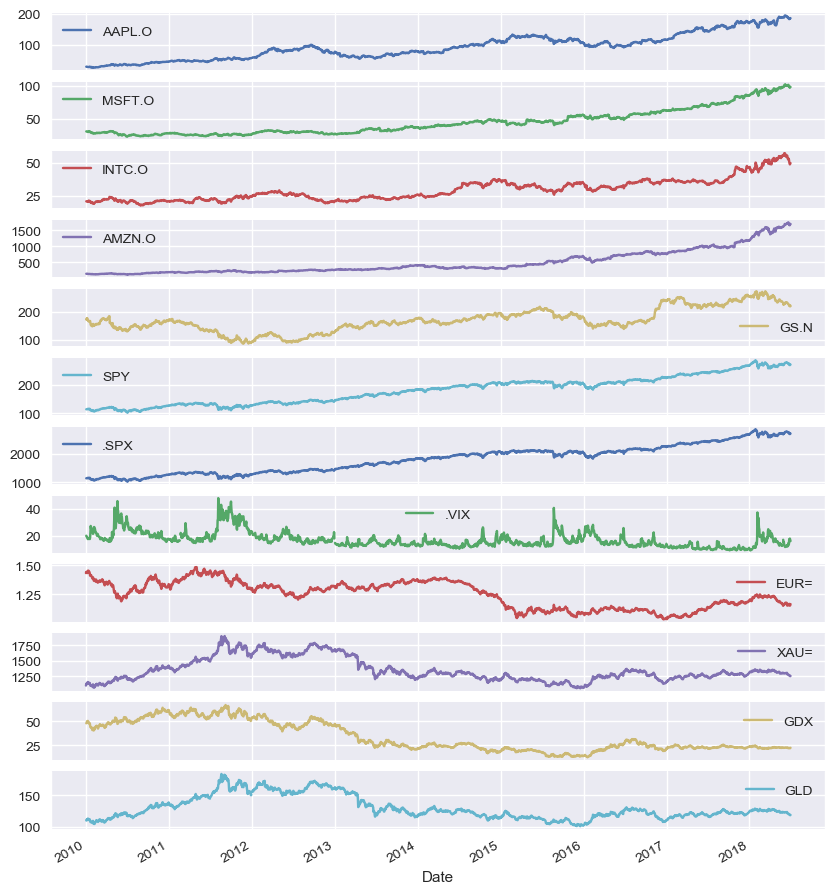

In [5]:
data.plot(figsize=(10,12),subplots=True)

### 数据中各个指标含义:
- AAPL.O   | Apple Stock
- MSFT.O   | Microsoft Stock
- INTC.O   | Intel Stock
- AMZN.O   | Amazon Stock
- GS.N     | Goldman Sachs Stock
- SPY      | SPDR S&P 500 ETF Trust
- .SPX     | S&P 500 Index
- .VIX     | VIX Volatility Index
- EUR=     | EUR/USD Exchange Rate
- XAU=     | Gold Price
- GDX      | VanEck Vectors Gold Miners ETF
- GLD      | SPDR Gold Trust


### 统计分析

- 1.数据中各项指标统计结果（小数点保留两位即可）
- 2.使用aggregate方法将多种统计指标汇总

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


In [7]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [8]:
data.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [9]:
data.aggregate([min,max,np.mean,np.std,np.median])

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
median,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500


### 序列变化情况计算

- 1.计算每一天各项指标的差异值（后一天减去前一天结果）
- 2.计算pct_change：增长率也就是 （后一个值-前一个值）／前一个值）
- 3.计算平均计算pct_change指标
- 4.绘图观察哪个指标平均增长率最高
- 5.计算连续时间的增长率（其中需要计算今天价格和昨天价格的差异）
- 6.看看各个指标最初的1块钱相当于现在的多少

In [10]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [11]:
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [12]:
data.pct_change().head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


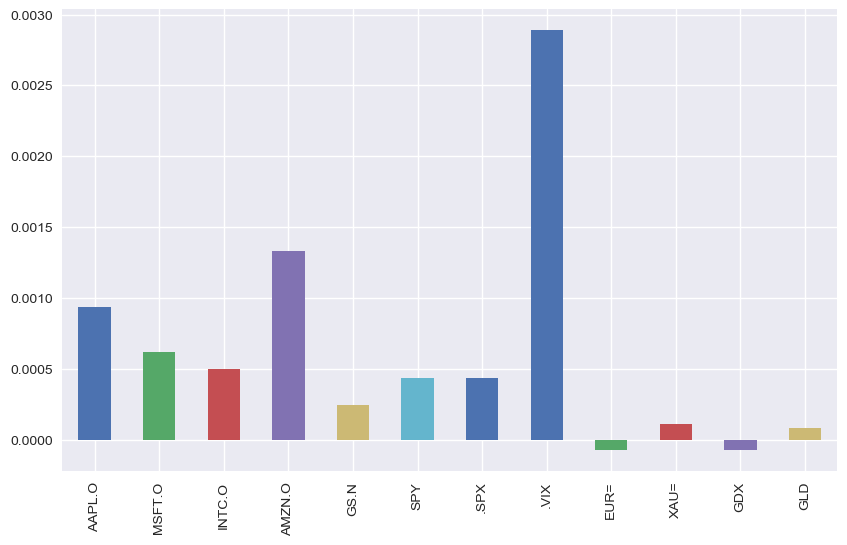

In [13]:
data.pct_change().mean().plot(kind='bar',figsize=(10,6))

In [14]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [15]:
data.shift(1).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-05,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-06,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-07,30.138541,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51


In [16]:
rets = np.log(data/data.shift(1))

In [17]:
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


In [18]:
np.cumsum([1,2,3,4])

array([ 1,  3,  6, 10])

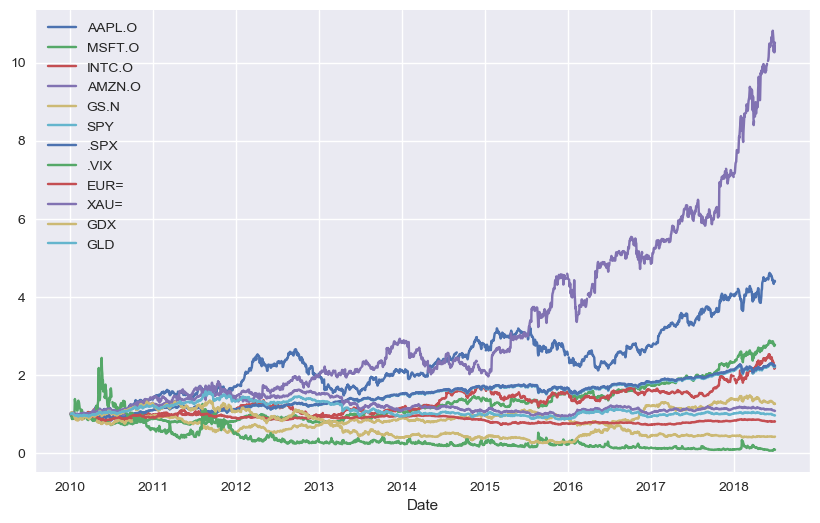

In [19]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6))

### 时间序列重采样
- 1.以星期为单位重构时间序列
- 2.不同指定标签的含义？

In [47]:
data.resample('1w')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [20]:
data.resample('1w').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [21]:
data.resample('1m').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


In [22]:
data.resample('1m',label='left').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2009-12-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-01-31,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-02-28,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-03-31,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-04-30,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


### 时间窗口
- 1.以20为长度制作窗口序列
- 2.统计窗口各个常用指标结果

In [23]:
data2 = data.dropna()

In [24]:
windows = 10

In [25]:
data2['AAPL.O'].rolling(window=windows).min()

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
2010-01-11           NaN
2010-01-12           NaN
2010-01-13           NaN
2010-01-14           NaN
2010-01-15     29.418542
2010-01-19     29.418542
2010-01-20     29.418542
2010-01-21     29.418542
2010-01-22     28.249972
2010-01-25     28.249972
2010-01-26     28.249972
2010-01-27     28.249972
2010-01-28     28.249972
2010-01-29     27.437544
2010-02-01     27.437544
2010-02-02     27.437544
2010-02-03     27.437544
2010-02-04     27.435687
2010-02-05     27.435687
2010-02-08     27.435687
2010-02-09     27.435687
2010-02-10     27.435687
2010-02-11     27.435687
2010-02-12     27.435687
2010-02-16     27.435687
                 ...    
2018-05-18    185.160000
2018-05-21    186.050000
2018-05-22    186.310000
2018-05-23    186.310000
2018-05-24    186.310000
2018-05-25    186.310000
2018-05-29    186.310000
2018-05-30    186.310000
2018-05-31    186.31

In [26]:
data2['min'] = data2['AAPL.O'].rolling(window=windows).min()
data2['max'] = data2['AAPL.O'].rolling(window=windows).max()
data2['mean'] = data2['AAPL.O'].rolling(window=windows).mean()
data2['std'] = data2['AAPL.O'].rolling(window=windows).std()

In [27]:
data2.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,min,max,mean,std
Date,,,,,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89,182.17,192.28,187.610,3.174440
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26,182.17,190.80,186.825,2.844778
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58,182.17,190.80,186.171,2.595815
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22,182.17,188.84,185.641,2.023690
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65,182.17,188.74,185.268,1.683745


### 股票序列分析策略
- 1.短期平均计算
- 2.长期平均计算
- 3.黄金交叉与死亡交叉绘图展示

In [28]:
data2['m1'] = data2['AAPL.O'].rolling(window=30).mean()

In [29]:
data2['m2'] = data2['AAPL.O'].rolling(window=250).mean()

In [30]:
data2[['AAPL.O','m1','m2']].tail()

,AAPL.O,m1,m2
Date,,,
2018-06-25,182.17,188.669000,168.45348
2018-06-26,184.43,188.545000,168.60788
2018-06-27,184.16,188.469000,168.76980
2018-06-28,185.50,188.379667,168.93572
2018-06-29,185.11,188.317000,169.10216


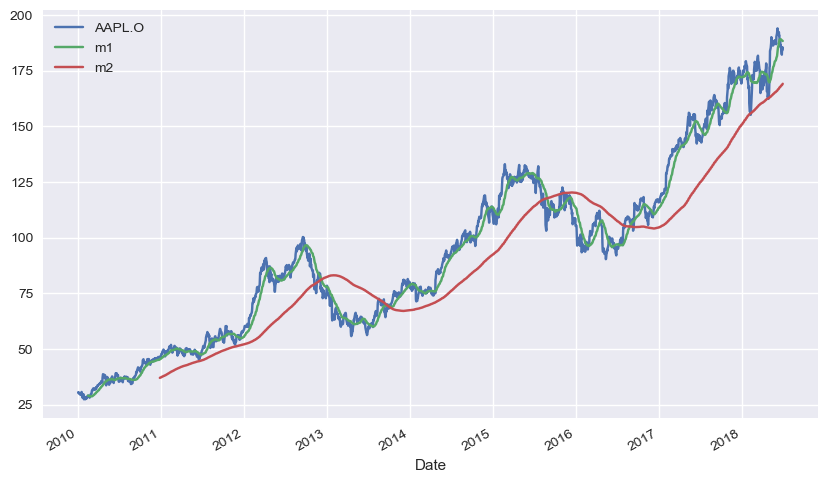

In [31]:
data2[['AAPL.O','m1','m2']].plot(figsize=(10,6))

In [32]:
data2['positions'] = np.where(data2['m1']>data2['m2'],1,-1)

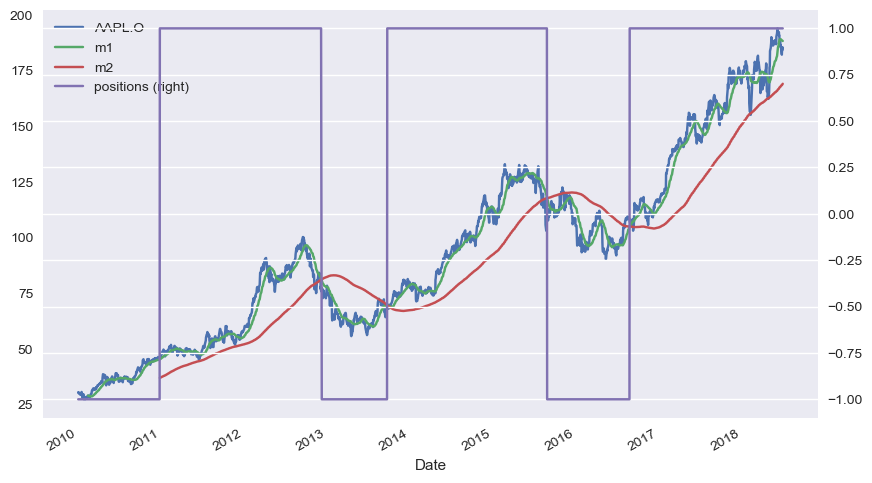

In [33]:
data2[['AAPL.O','m1','m2','positions']].plot(figsize=(10,6),secondary_y='positions')

### 回归分析
- 1.[.spx与.vix]指标之间的关系
- 2.绘图展示他们之间的变化情况
- 3.回归与相关系数计算
- 4.随着年份的变化，计算相关系数的变化情况，并展示

In [34]:
data2 = data2[['.SPX','.VIX']]
data2.head()

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8988a318d0>,
      dtype=object)

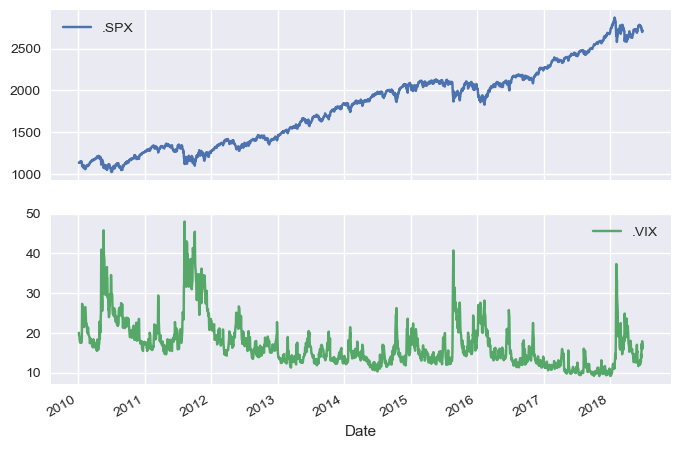

In [35]:
data2.plot(subplots=True)

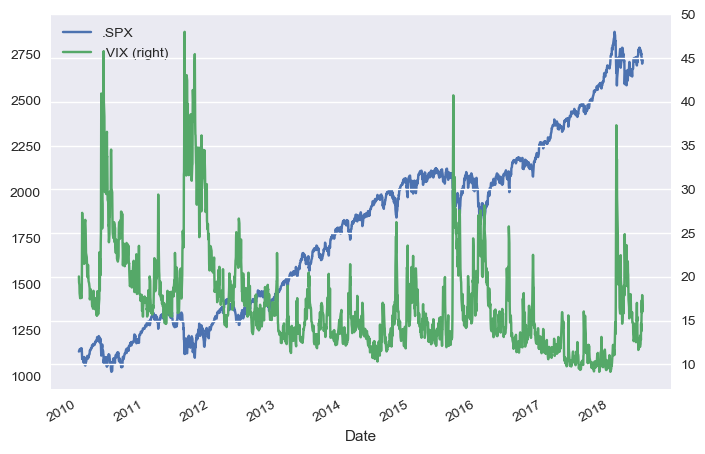

In [36]:
data2.plot(secondary_y='.VIX')

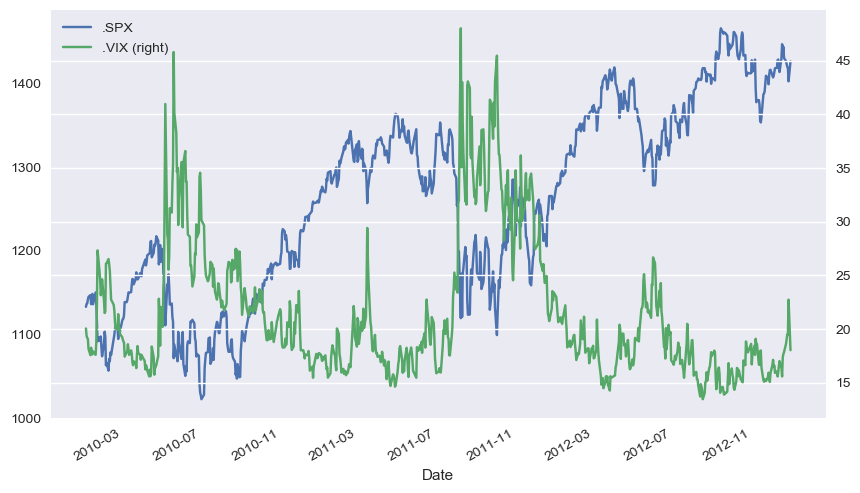

In [37]:
data2.loc[:'2012-12-31'].plot(secondary_y='.VIX',figsize=(10,6))

In [38]:
rets = np.log(data/data.shift(1))
rets.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006125,0.021342,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8991139390>,
      dtype=object)

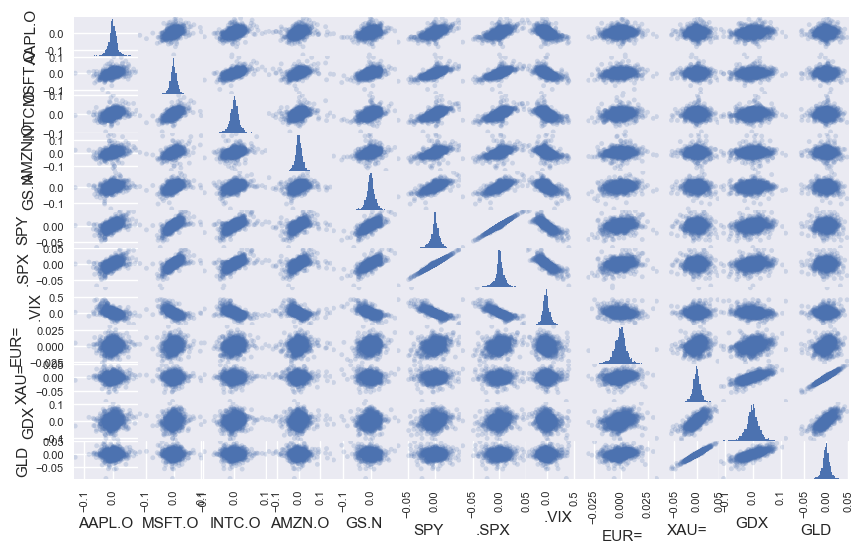

In [39]:
pd.plotting.scatter_matrix(rets,
                           alpha = 0.2,
                           diagonal='hist',
                           hist_kwds={'bins':50},
                           figsize=(10,6)
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89ca03b550>,
      dtype=object)

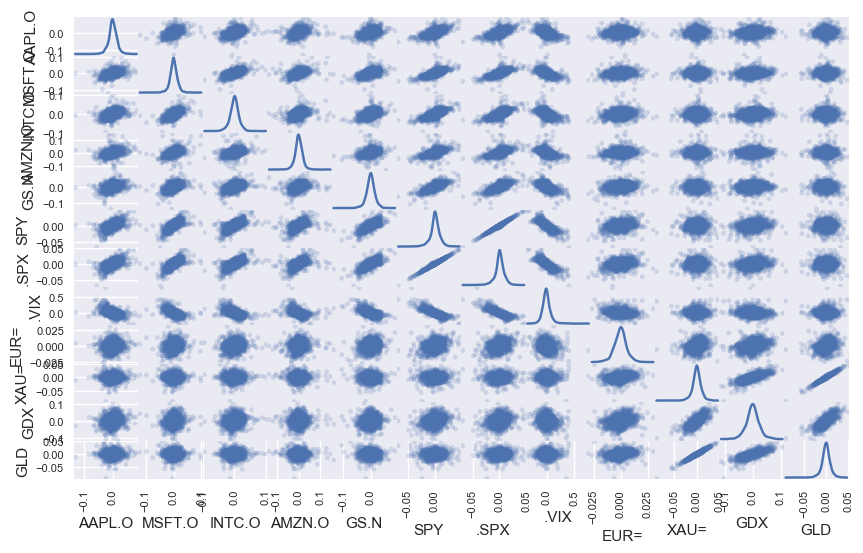

In [40]:
pd.plotting.scatter_matrix(rets,
                           alpha = 0.2,
                           diagonal='kde',
                           figsize=(10,6)
)

构建回归方程

In [41]:
rets.dropna(inplace =True)

In [42]:
reg = np.polyfit(rets['.SPX'],rets['.VIX'],deg=1)

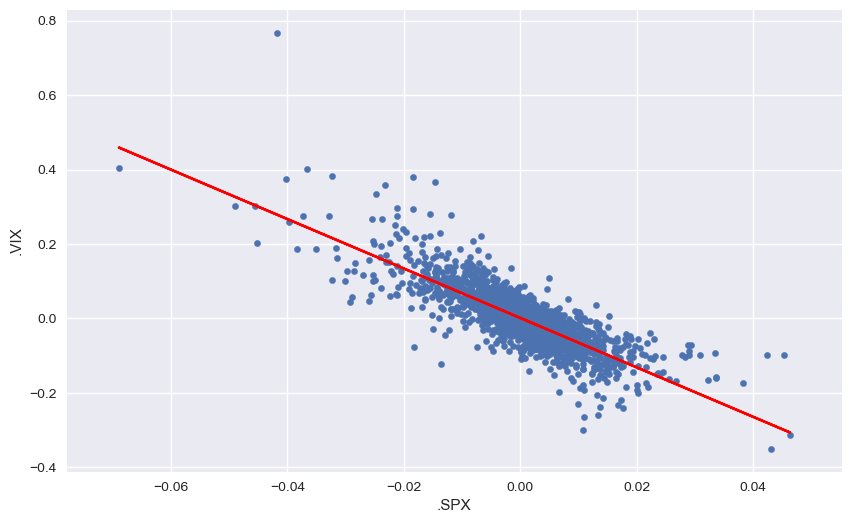

In [43]:
ax = rets.plot(kind='scatter',x='.SPX',y='.VIX',figsize=(10,6))
ax.plot(rets['.SPX'],np.polyval(reg,rets['.SPX'],),'r')

相关系数

In [44]:
rets.corr()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
AAPL.O,1.000000,0.413093,0.393309,0.345581,0.352039,0.562978,0.563788,-0.465810,0.084422,0.030389,0.152755,0.035030
MSFT.O,0.413093,1.000000,0.563584,0.433672,0.448618,0.666322,0.668508,-0.537760,0.121769,-0.010466,0.128357,-0.010138
INTC.O,0.393309,0.563584,1.000000,0.340040,0.442954,0.646449,0.647735,-0.518948,0.148081,0.003763,0.143252,0.004410
AMZN.O,0.345581,0.433672,0.340040,1.000000,0.326205,0.528562,0.530555,-0.450771,0.108972,-0.027819,0.088004,-0.027335
GS.N,0.352039,0.448618,0.442954,0.326205,1.000000,0.715294,0.716214,-0.575029,0.170495,-0.064094,0.083783,-0.061233
SPY,0.562978,0.666322,0.646449,0.528562,0.715294,1.000000,0.996086,-0.803073,0.254645,0.001986,0.213296,0.004500
.SPX,0.563788,0.668508,0.647735,0.530555,0.716214,0.996086,1.000000,-0.806532,0.256843,0.005861,0.215429,0.008066
.VIX,-0.465810,-0.537760,-0.518948,-0.450771,-0.575029,-0.803073,-0.806532,1.000000,-0.156060,-0.001751,-0.169031,-0.000410
EUR=,0.084422,0.121769,0.148081,0.108972,0.170495,0.254645,0.256843,-0.156060,1.000000,0.276594,0.304285,0.274877
XAU=,0.030389,-0.010466,0.003763,-0.027819,-0.064094,0.001986,0.005861,-0.001751,0.276594,1.000000,0.743871,0.988237


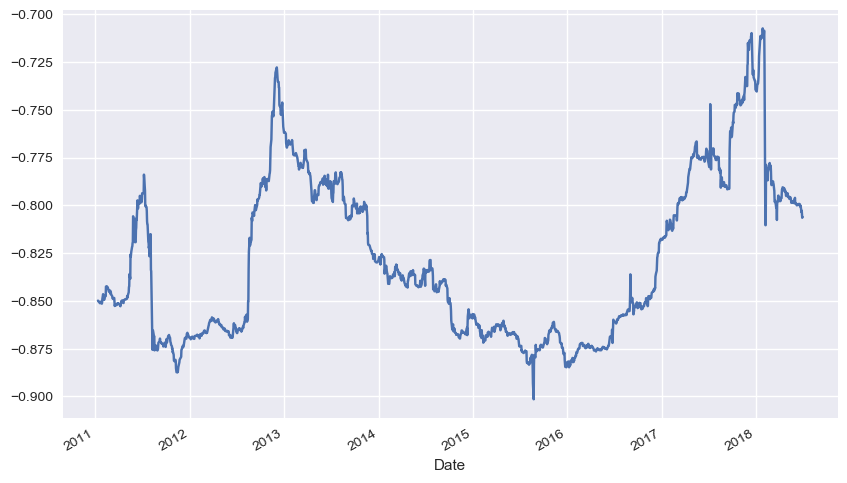

In [45]:
rets['.SPX'].rolling(window=250).corr(rets['.VIX']).plot(figsize=(10,6))